In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For the visualization
import sklearn
import skimage.io
import skimage.feature
import skimage.transform
import os
from glob import glob
import re
%matplotlib inline

In [2]:
#Read the folders in the list
folder = os.listdir('data')
print(folder)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [3]:
all_path = []
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))

In [4]:
img_all = skimage.io.ImageCollection(all_path)

In [5]:
len(img_all)

2057

In [6]:
def extract_lable(text):
    try:
        lable = re.search(r'./data/(.*?)Head\\',text).group(1)
    except:
        lable = re.search(r'./data/(.*?)\\',text).group(1)
    return lable.lower()

In [7]:
labels = list(map(extract_lable,img_all.files))

In [8]:
def buffer(io):
    return io
img_all_arrs = np.array(list(map(buffer,img_all)))

In [9]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [10]:
data = dict()
data['description'] = 'There are 20 classes and 2057 images are there. All the images are 80 * 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['lables'] = set(labels)

In [11]:
#save the file in pickle
import pickle
import collections

In [12]:
pickle.dump(data,open('data_animals_head_20.pickle','wb'))

In [13]:
count_values = collections.Counter(data['target'])
count_values

Counter({'cat': 159,
         'dog': 132,
         'panda': 118,
         'pigeon': 115,
         'tiger': 113,
         'cow': 103,
         'deer': 103,
         'duck': 103,
         'lion': 102,
         'bear': 101,
         'chicken': 100,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'monkey': 100,
         'mouse': 100,
         'rabbit': 100,
         'sheep': 100,
         'wolf': 100,
         'natural': 8})

Text(0.5, 1.0, 'Lable Count')

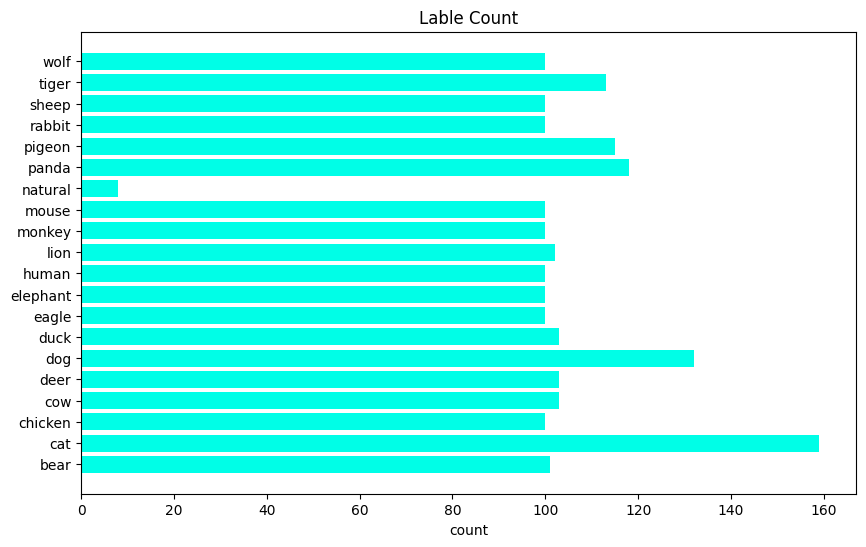

In [14]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values,color='#00FEE7')
plt.xlabel('count')
plt.title('Lable Count')

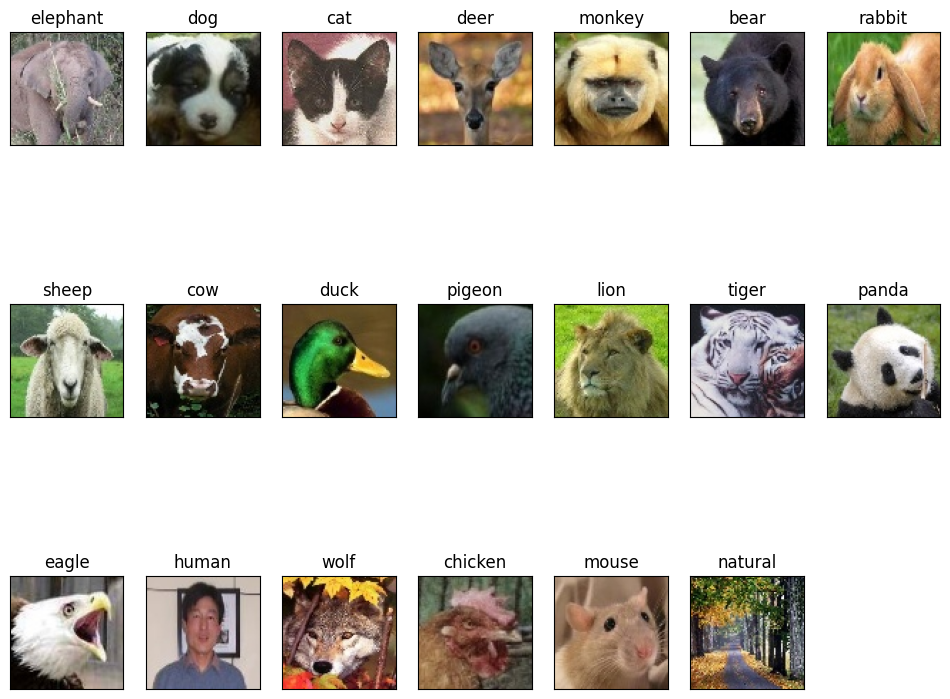

In [15]:
plt.figure(figsize=(12,10))
for i, c in enumerate(data['lables']):
    index = data['target'].index(c)
    img = data['data'][index]
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    plt.title(c)
plt.show()

In [23]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform
from matplotlib import pyplot as plt

In [17]:
# Load the data

In [18]:
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [19]:
data['description']

'There are 20 classes and 2057 images are there. All the images are 80 * 80 (rgb)'

In [20]:
# split the data into independent and dependent
x = data['data']
y = data['target']

In [21]:
# split the data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [22]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1645, 80, 80, 3), (412, 80, 80, 3), 1645, 412)

In [24]:
#Feature Extraction
#HOG

In [26]:
img = skimage.io.imread('Images/lion.bmp')

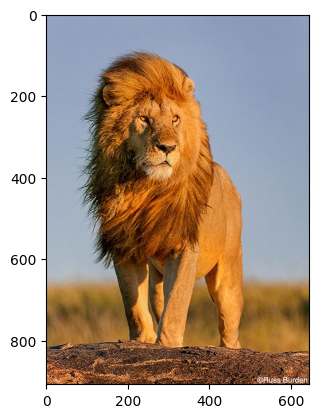

In [27]:
plt.imshow(img)

In [28]:
# Hog transform
img_re = skimage.transform.rescale(img,1/3)
img_re = skimage.transform.resize(img_re,(302,215,3))
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,pixels_per_cell=(14,14),cells_per_block=(2,2),visualize=True)

In [29]:
len(feature_vector)

10080

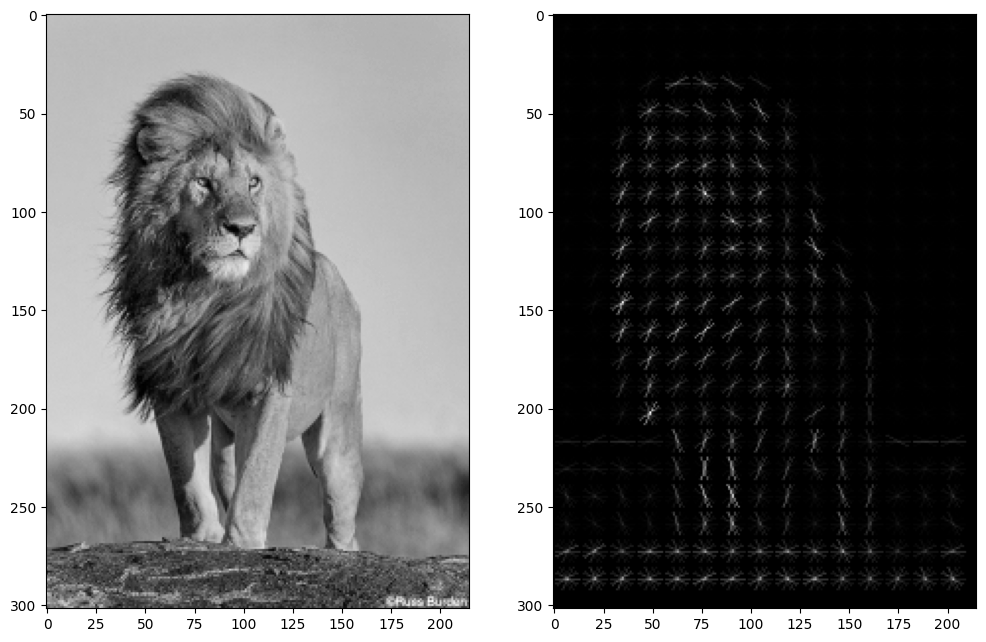

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

In [31]:
#Preprocessing

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [34]:
x_train.shape

(1645, 80, 80, 3)

In [35]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [36]:
x_train_gray.shape

(1645, 80, 80)

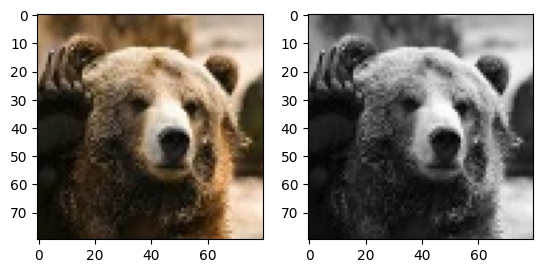

In [37]:
plt.subplot(1,2,1)
plt.imshow(x_train[8])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[8],cmap='gray')

In [38]:
class hogtransformer(BaseEstimator , TransformerMixin):
    def __init__(self,orientations=9, pixels_per_cell=(8,8),cells_per_block=(3,3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                               cells_per_block=self.cells_per_block)
            return hog_features
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [39]:
hogt = hogtransformer()

In [40]:
x_train_hog = hogt.fit_transform(x_train_gray)

In [41]:
x_train_hog.shape

(1645, 5184)

In [42]:
# Training Machine Learning Model

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [44]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.1)

In [45]:
#pipeline
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [46]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [47]:
#step-1: Conver into grayscale
x_train_gray = grayify.fit_transform(x_train)
#step-2: extract the features
x_train_hog = hogify.fit_transform(x_train_gray)
#step-3: Normalization
x_train_scale = scalify.fit_transform(x_train_hog)
#step-4: Machine learning model
model_sgd.fit(x_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [48]:
x_test_gray = grayify.fit_transform(x_test)
x_test_hog = hogify.fit_transform(x_test_gray)
x_test_scale = scalify.transform(x_test_hog)
y_pred_test = model_sgd.predict(x_test_scale)

'eagle'

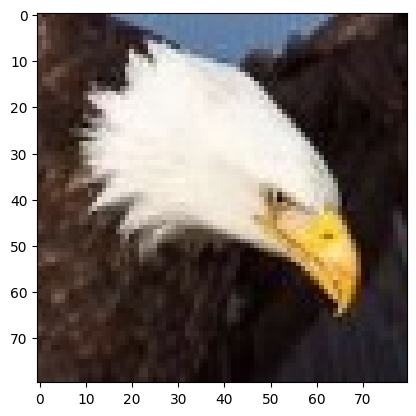

In [49]:
vvv=17
plt.imshow(x_test[vvv])
y_pred_test[vvv]

In [50]:
#Model Evalution

In [51]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.500000,0.400000,0.444444,20.000000
cat,0.696970,0.718750,0.707692,32.000000
chicken,0.482759,0.700000,0.571429,20.000000
cow,0.333333,0.333333,0.333333,21.000000
deer,0.625000,0.476190,0.540541,21.000000
dog,0.500000,0.423077,0.458333,26.000000
duck,0.736842,0.666667,0.700000,21.000000
eagle,0.523810,0.550000,0.536585,20.000000
elephant,0.571429,0.800000,0.666667,20.000000
human,0.826087,0.950000,0.883721,20.000000


In [52]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5461425477358162

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
model_pipe = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform', hogtransformer(orientations=8,pixels_per_cell=(12,12),
                                   cells_per_block=(3,3))),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.001))
])

In [55]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(12, 12))),
                ('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(early_stopping=True, eta0=0.001,
                               learning_rate='adaptive'))])

In [56]:
y_pred_test = model_pipe.predict(x_test)

In [57]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True))

In [58]:
cr.T

,precision,recall,f1-score,support
bear,0.789474,0.750000,0.769231,20.000000
cat,0.705882,0.750000,0.727273,32.000000
chicken,0.650000,0.650000,0.650000,20.000000
cow,0.571429,0.571429,0.571429,21.000000
deer,0.592593,0.761905,0.666667,21.000000
dog,0.588235,0.384615,0.465116,26.000000
duck,0.750000,0.857143,0.800000,21.000000
eagle,0.428571,0.300000,0.352941,20.000000
elephant,0.818182,0.900000,0.857143,20.000000
human,0.800000,1.000000,0.888889,20.000000


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
estimator = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform', hogtransformer()),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [61]:
param_grid = [
    {
        'hogtransform__orientations':[7,8,9,10],
        'hogtransform__pixels_per_cell':[(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block':[(2,2),(3,3)],
        'sgd__loss':['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate':['optimal']
    },
    {
        'hogtransform__orientations':[7,8,9,10],
        'hogtransform__pixels_per_cell':[(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block':[(2,2),(3,3)],
        'sgd__loss':['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate':['adaptive'],
        'sgd__eta0':[0.001,0.01]
    }
]

In [62]:
model_grid = GridSearchCV(estimator,param_grid=param_grid,
                          scoring='accuracy',n_jobs=1,cv=3,verbose=2)

In [63]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  18.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  17.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  17.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  18.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  18.5s
[CV] END hogtransform__cel

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  12.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  11.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  16.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  16.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  17.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  16.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  16.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtra

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   3.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   3.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.8s
[CV] E

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   4.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   3.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   3.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   3.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total ti

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   3.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   4.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   3.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   3.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   3.5s

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   5.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   5.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time= 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   9.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  10.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   4.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   4.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   4.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  10.0s


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   5.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   4.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   3.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   3.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   8.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   8.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.8s
[CV] END

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  15.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  14.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  14.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  16.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  18.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  18.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  18.2s

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   8.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grayscale', rgb2gray_transform()),
                                       ('hogtransform', hogtransformer()),
                                       ('scaler', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__learning_rate': ['optimal'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__eta0': [0.001, 0.01],
                          'sgd__learning_rate': ['adaptive'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']}],
             scoring='accuracy', verbose=2)

In [64]:
model_grid.best_params_

{'hogtransform__cells_per_block': (3, 3),
 'hogtransform__orientations': 9,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'squared_hinge'}

In [65]:
model_grid.best_score_

0.7355754102792513

In [66]:
model_best = model_grid.best_estimator_

In [67]:
model_best.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform', hogtransformer()),
                ('scaler', StandardScaler()),
                ('sgd', SGDClassifier(loss='squared_hinge'))])>

In [68]:
y_pred = model_best.predict(x_test)

In [69]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,precision,recall,f1-score,support
bear,0.944444,0.850000,0.894737,20.000000
cat,0.736842,0.875000,0.800000,32.000000
chicken,0.782609,0.900000,0.837209,20.000000
cow,0.636364,0.666667,0.651163,21.000000
deer,0.842105,0.761905,0.800000,21.000000
dog,0.708333,0.653846,0.680000,26.000000
duck,0.653846,0.809524,0.723404,21.000000
eagle,0.727273,0.800000,0.761905,20.000000
elephant,0.826087,0.950000,0.883721,20.000000
human,0.782609,0.900000,0.837209,20.000000


In [70]:
#save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

In [71]:
# Make Pipeline

In [72]:
from sklearn.pipeline import make_pipeline

In [73]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                         hogtransformer(orientations=10,
                                        pixels_per_cell=(8,8),
                                        cells_per_block=(2,2)))

In [74]:
feature_vector = pipeline1.fit_transform(x_train)

In [75]:
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [76]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.001,early_stopping=True)

In [77]:
model.fit(transformed_xtrain, y_train)

SGDClassifier(alpha=0.001, early_stopping=True)

In [78]:
# Evaluate
feature_vector =  pipeline1.fit_transform(x_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [79]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test, output_dict=True)).T
cr

C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanke\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,precision,recall,f1-score,support
bear,0.760000,0.950000,0.844444,20.000000
cat,0.742857,0.812500,0.776119,32.000000
chicken,0.818182,0.900000,0.857143,20.000000
cow,0.700000,0.666667,0.682927,21.000000
deer,0.809524,0.809524,0.809524,21.000000
dog,0.750000,0.692308,0.720000,26.000000
duck,0.782609,0.857143,0.818182,21.000000
eagle,0.764706,0.650000,0.702703,20.000000
elephant,0.904762,0.950000,0.926829,20.000000
human,1.000000,0.900000,0.947368,20.000000


In [80]:
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [81]:
pickle.dump(scalar,open('dsa_scalar.pickle','wb'))

In [82]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.pipeline import make_pipeline
import os

import skimage
import skimage.color
import skimage.transform
import skimage.filters
import skimage.io

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

    
class hogtransformer(BaseEstimator , TransformerMixin):
    def __init__(self,orientations=9, pixels_per_cell=(8,8),cells_per_block=(3,3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                               cells_per_block=self.cells_per_block)
            return hog_features
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [84]:
#pipeline model
image = skimage.io.imread('images/eagle.jpg')
#trnasform image into the 80*80
image_resize = skimage.transform.resize(image,(80,80))
image_scale = 255*image_resize
image_transform = image_scale.astype(np.uint8)
#rgb to gray
gray = skimage.color.rgb2gray(image_transform)
feature_vector = skimage.feature.hog(gray,orientations=10,
                               pixels_per_cell=(8,8),cells_per_block=(2,2))
feature_vector

array([0.19868374, 0.14667119, 0.12041307, ..., 0.04603933, 0.04529182,
       0.00674029])

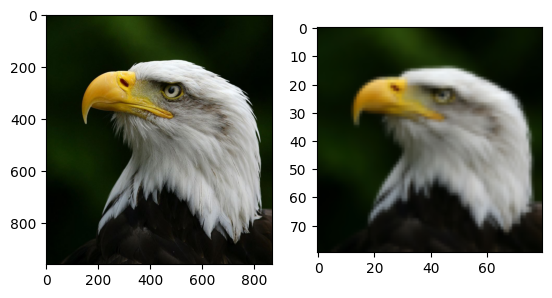

In [85]:
# plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_resize)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


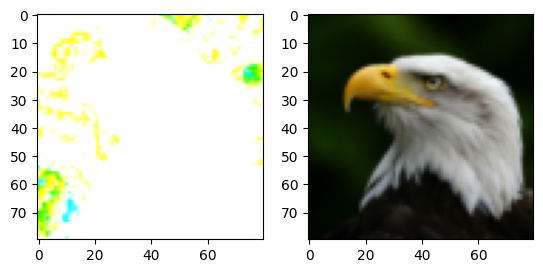

In [86]:
plt.subplot(1,2,1)
plt.imshow(image_scale)
plt.subplot(1,2,2)
plt.imshow(image_transform)

In [87]:
#Load the model
model = pickle.load(open('dsa_image_classification_sgd.pickle','rb'))
scaler = pickle.load(open('dsa_scalar.pickle','rb'))

In [89]:
#Calculate Probability
scalex = scaler.transform(feature_vector.reshape(1,-1))
decision_value = model.decision_function(scalex)

In [90]:
feature_vector.shape

(3240,)

In [91]:
result = model.predict(scalex)

In [92]:
result

array(['eagle'], dtype='<U8')

In [93]:
decision_value

array([[ -902.191159  , -1030.43094985,  -742.64757697, -1091.92207202,
        -1501.75868852, -1235.88586756,  -320.63816283,   213.89877076,
        -1475.66960254, -1092.19341275, -1782.32800352,  -459.09366864,
        -1388.51372317, -1229.87809215,  -533.10414252,  -315.78636188,
        -1414.44325741, -1113.21881502, -1023.30225382, -2170.87746099]])

In [94]:
labels = model.classes_

In [95]:
decision_value = decision_value.flatten()

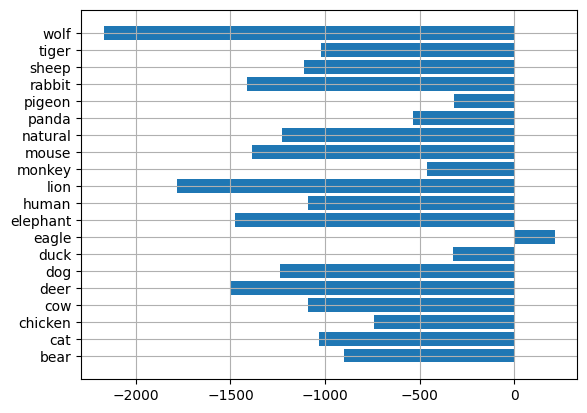

In [96]:
plt.barh(labels,decision_value)
plt.grid()

In [97]:
#calculate z score
z = scipy.stats.zscore(decision_value)
prob_value = scipy.special.softmax(z)
prob_value

array([0.03732642, 0.0294732 , 0.05007808, 0.02631696, 0.01237016,
       0.02018682, 0.1089547 , 0.2916512 , 0.01297915, 0.02630381,
       0.00737779, 0.08442763, 0.01523944, 0.02041145, 0.07366782,
       0.1099328 , 0.01452867, 0.02530456, 0.02986277, 0.00360658])

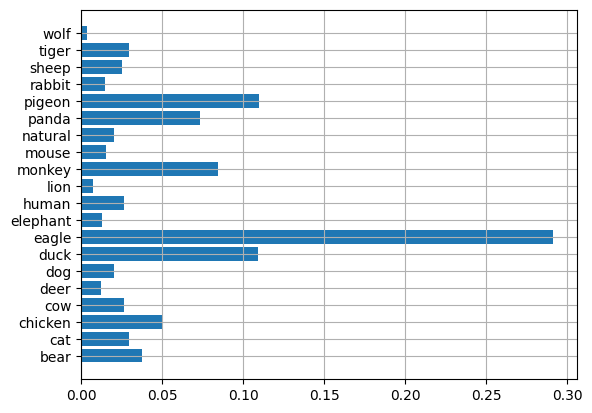

In [98]:
plt.barh(labels, prob_value)
plt.grid()

In [99]:
#Tope 5 probbility values
top_5_prob_ind = prob_value.argsort()[::-1][:5]

In [100]:
top_lables = labels[top_5_prob_ind]
top_prob = prob_value[top_5_prob_ind]

In [101]:
top_lables,top_prob

(array(['eagle', 'pigeon', 'duck', 'monkey', 'panda'], dtype='<U8'),
 array([0.2916512 , 0.1099328 , 0.1089547 , 0.08442763, 0.07366782]))

In [102]:
top_dict = dict()
for key,val in zip(top_lables,top_prob):
    top_dict.update({key:np.round(val,3)})

In [103]:
top_dict

{'eagle': 0.292,
 'pigeon': 0.11,
 'duck': 0.109,
 'monkey': 0.084,
 'panda': 0.074}